<a href="https://colab.research.google.com/github/VindhyaSRajan/Master-s-Thesis/blob/BERT/CosineSim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installations and Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install sentence_transformers

In [3]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

100%|██████████| 405M/405M [00:17<00:00, 22.9MB/s]


##Basic Functions for the dataframes

In [0]:
def columns(df):
  return df.columns

In [0]:
def head(df):
  return df.head()

##Data Loader

In [0]:
#The Entire train data for BERT Embeddings
df_BERT = pd.read_pickle('/content/drive/My Drive/Amazon_data/Amazon2014_TRAIN_pickle_data')

In [0]:
print(f'Stats for the data frame containing the clean review Text embeddings are: {len(df_BERT):d} and the columns are: {columns(df_BERT)} and the head of the data frame is : {head(df_BERT)}')

In [0]:
#Dataframe for the themes and the words describing them
# df_theme = pd.read_csv('/content/BERT_Theme_v2.csv')
df_theme = pd.read_csv('/content/BERT_Theme_relevance.csv')

In [9]:
df_theme.head()

,Theme_Topic,Topic_Words,Topic_BERTEmbedded
0,Product_Durability,durable durability years weeks lasting months ...,"[-0.21405542, 0.33172607, 0.9574351, 0.6615066..."
1,Product_Assembly,assemble easy difficult tools fairly forget re...,"[-0.573983, 0.584515, 0.48192063, 0.48634687, ..."
2,Product_Weight,weight heavy light duty weighs heavier bright ...,"[0.3603283, 0.35975662, -0.3613524, 0.4934713,..."
3,Product_Worth,worth waste save penny reasonable every wasted...,"[-0.5470613, 0.7995358, -0.58623946, 0.3587412..."
4,Product_MarketService,market great excellent sale service awesome cu...,"[-0.5436856, 1.0086282, 0.6612369, 0.123941034..."


In [0]:
print(f'Stats for the data frame containing the clean review Text embeddings are: {len(df_theme):d} and the columns are: {columns(df_theme)} and the head of the data frame is : {head(df_theme)}')

In [0]:
#Annotated data for checking Theme Relevance and Accuracy
df_annotated = pd.read_csv('/content/drive/My Drive/Amazon_data/Amazon2014_merged_ProdThemeAnnotated_CLASSBALANCED.csv')

In [25]:
df_annotated.head()

,asin,reviewText,summary,category,main_cat,Review_Theme,reviewText_embeddings,ReviewText_Number
0,B00004RAGL,Met the need for installing the dehymidifer.,Four Stars,"['Patio, Lawn & Garden', 'Gardening & Lawn Car...",Amazon Home,Product_Assembly,"[-0.059326738, 0.38552245, 0.9674548, 0.812928...",0
1,B0074EBUWM,I spent a lot of time looking for a cordless m...,Dead on Arrival,"['Patio, Lawn & Garden', 'Outdoor Power Tools'...",Amazon Home,Product_Assembly,"[-0.25338987, 0.36019057, -0.28713477, 0.23139...",1
2,B000VC1AOM,This is a decent metal detector and great for ...,Bounty Hunter QSIGWP Quick Silver Metal Detect...,"['Patio, Lawn & Garden', 'Outdoor Power Tools'...",Amazon Home,Product_Assembly,"[-0.51333106, 0.90478, -0.25980666, 0.21618271...",2
3,B000EX83RU,Senor lost connection every 4 -6 hours (even l...,Total dud,"['Patio, Lawn & Garden', 'Outdoor Dcor', 'Ther...",All Electronics,Product_Assembly,"[0.017587889, 0.6921608, 0.489983, 0.12248825,...",3
4,B01HDW58I6,Easy to read. Easy to set up. Arrived earlie...,Five Stars,"['Patio, Lawn & Garden', 'Outdoor Dcor', 'Ther...",Amazon Home,Product_Assembly,"[-0.7658048, -0.49037442, 0.88225526, 0.360259...",4


In [0]:
df = pd.read_csv('/content/BERT_classbalanced75BESTresults.csv')

In [0]:
df.tail()

##IN case-manual input

In [0]:
sentence = 'Weak light; would not buy again!'
#Encode Sentences to embeddings for Theme
# sentences = sentences.astype(str)
sentence_embeddings = model.encode(sentence)

In [0]:
d = {'sentence': sentence, 'embedding': sentence_embeddings}

df_manual = pd.DataFrame(data = d)
df_manual.shape

(32, 2)

##Preparing Data for the Topic Relevance

In [0]:
#Encode Sentences to embeddings for Theme
sentences = df_theme.Topic_Words.astype(str)
sentence_embeddings = model.encode(sentences)

In [0]:
df_theme['Topic_BERTEmbedded'] = sentence_embeddings

In [0]:
#Encode Sentences to embeddings for all reviewText
sentences = df_annotated.reviewText.astype(str)
sentence_embeddings = model.encode(sentences)
df_annotated['reviewText_embeddings'] = sentence_embeddings

In [0]:
#Just checking if sentences that are similar to a theme are actually closer to each other or not
for i in range(1,10):
    print(cosine_similarity(df_annotated['reviewText_embeddings'].iloc[i],df_annotated['reviewText_embeddings'].iloc[i+1]))

In [0]:
def cosine_similarity(u,v):
    """
    Cosine similarity reflects the degree of similariy between u and v
        
    Arguments:
        u -- a word vector of shape (n,)          
        v -- a word vector of shape (n,)
    Returns:
        cosine_similarity -- the cosine similarity between u and v defined by the formula above.
    """
    
    distance = 0.0
    # Compute the dot product between u and v (≈1 line)
    dot = np.dot(u,v)
    # Compute the L2 norm of u (≈1 line)
    norm_u = np.sqrt(np.sum(u * u))
    
    # Compute the L2 norm of v (≈1 line)
    norm_v = np.sqrt(np.sum(v * v))
    # Compute the cosine similarity defined by formula (1) (≈1 line)
    cosine_similarity = dot / (norm_u * norm_v)
   
    return cosine_similarity

In [0]:
def text_theme_cosine_similarity(text_embedding):
    
    for i in range (0,16):
       # Since we have 16 themes discovered, we will see how similar are they to the sentences
       f = open('BERT_classbalancedtest_1.csv','a')
       similarity = (cosine_similarity(text_embedding,df_theme.Topic_BERTEmbedded.iloc[i]))
       print(f' {df_theme.Theme_Topic[i]}:',similarity) 
       f.write("%s,%s\n" % (str(df_theme.Theme_Topic[i]), str(similarity))) #Storing the results for all the similar values
      #  yield df_theme.Theme_Topic[i],similarity 

In [0]:
#Now we have to sort the cosine similarity obtained for all the reviews
def cosine_similarity_sort(filename):
    df = pd.read_csv(filename, names = ['Theme','Cosine_Similarity'])
    df['C'] = np.arange(len(df))
    df['ReviewText_Number'] = df.C.floordiv(16)
    df = df.drop(columns = ['C'])
    df = df.sort_values(['ReviewText_Number','Cosine_Similarity'],ascending=[True,False])
    df.to_csv(filename)
    return df
    

In [31]:
#For all the reviews, change range based on the file in use: 75 for annotated reviews
for i in range (0,75):
    # print(df_annotated.Review_Text.iloc[i])
    text_theme_cosine_similarity(df_annotated.reviewText_embeddings.iloc[i])

 Product_Durability: 0.35178652
 Product_Assembly: 0.42671797
 Product_Weight: 0.32421768
 Product_Worth: 0.473649
 Product_MarketService: 0.525125
 Product_Quality: 0.48906055
 Product_Recommendation: 0.5597242
 Product_Fit: 0.5868982
 Product_Shipping: 0.42664745
 Product_for_Family: 0.369259
 Product_LookAndFeel: 0.4392041
 Product_Usefulness: 0.5139122
 Product_Reliability: 0.5204949
 Product_as_Expected: 0.59625316
 Product_Functionality: 0.5010776
 Product_Ease_of_Use: 0.45582756
 Product_Durability: 0.38751492
 Product_Assembly: 0.34672537
 Product_Weight: 0.19728665
 Product_Worth: 0.3680573
 Product_MarketService: 0.31724134
 Product_Quality: 0.2148792
 Product_Recommendation: 0.27009264
 Product_Fit: 0.30995184
 Product_Shipping: 0.24322723
 Product_for_Family: 0.42197028
 Product_LookAndFeel: 0.22768241
 Product_Usefulness: 0.31158254
 Product_Reliability: 0.24144392
 Product_as_Expected: 0.13773207
 Product_Functionality: 0.2855837
 Product_Ease_of_Use: 0.383869
 Product_Du

In [0]:
df = cosine_similarity_sort('/content/BERT_classbalancedtest_1.csv')

In [34]:
df.head()

,Theme,Cosine_Similarity,ReviewText_Number
13,Product_as_Expected,0.596253,0
7,Product_Fit,0.586898,0
6,Product_Recommendation,0.559724,0
4,Product_MarketService,0.525125,0
12,Product_Reliability,0.520495,0


##Topic Relevance filtering

In [0]:
df_annotated['ReviewText_Number'] = np.arange(len(df_annotated))

In [0]:
merge_df = pd.merge(df, df_annotated, on='ReviewText_Number',how='left')

In [0]:
merge_df['CorrectOrNot'] = (merge_df['Theme']==merge_df['Review_Theme']).astype(int)

In [0]:
merge_df = merge_df.drop(columns = 'reviewText_embeddings')

In [49]:
merge_df.head()

,Theme,Cosine_Similarity,ReviewText_Number,asin,reviewText,summary,category,main_cat,Review_Theme,CorrectOrNot
0,Product_as_Expected,0.596253,0,B00004RAGL,Met the need for installing the dehymidifer.,Four Stars,"['Patio, Lawn & Garden', 'Gardening & Lawn Car...",Amazon Home,Product_Assembly,0
1,Product_Fit,0.586898,0,B00004RAGL,Met the need for installing the dehymidifer.,Four Stars,"['Patio, Lawn & Garden', 'Gardening & Lawn Car...",Amazon Home,Product_Assembly,0
2,Product_Recommendation,0.559724,0,B00004RAGL,Met the need for installing the dehymidifer.,Four Stars,"['Patio, Lawn & Garden', 'Gardening & Lawn Car...",Amazon Home,Product_Assembly,0
3,Product_MarketService,0.525125,0,B00004RAGL,Met the need for installing the dehymidifer.,Four Stars,"['Patio, Lawn & Garden', 'Gardening & Lawn Car...",Amazon Home,Product_Assembly,0
4,Product_Reliability,0.520495,0,B00004RAGL,Met the need for installing the dehymidifer.,Four Stars,"['Patio, Lawn & Garden', 'Gardening & Lawn Car...",Amazon Home,Product_Assembly,0


In [0]:
 #Calculating the Accuracy of the model
# def predicted_theme(df):
for i in range(0,75*16,16):
    # print(i)
    counter = 0
    predicted_theme = df.Theme.iloc[i]
    for j in range(0,74):
        if (predicted_theme == Actual_Review_Theme[j]):
            counter += 1
        else:
            counter += 0

In [0]:
merge_df.to_csv('./BERT_classbalanced75BESTCrossCheck_Relevance.csv')

##Plotting the Predicted Theme for all reviews

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


for i in range(0,75*16,16): #n reviews * number_of_distinct_themes
    objects = df['Theme'].iloc[i:i+15]
    performance = df['Cosine_Similarity'].iloc[i:i+15]

    plt.barh(objects,performance, align='center', alpha=0.5)

    plt.ylabel('Cosine Similarity')
    plt.title('Review Theme Predicted')
    plt.show()   

##UserINPUT and Test Lab

In [0]:
#Test Cell
print(df_manual.sentence.iloc[0])
text_theme_cosine_similarity(df_manual.embedding.iloc[0])
cosine_similarity_sort('/content/BERT_classbalancedtest.csv')

Weak light; would not buy again!
 Product_Durability: 0.3283791
 Product_Assembly: 0.25144088
 Product_Weight: 0.27887335
 Product_Worth: 0.24164328
 Product_MarketService: 0.19457628
 Product_Quality: 0.35911393
 Product_Recommendation: 0.33151546
 Product_Fit: 0.37781093
 Product_Shipping: 0.2302092
 Product_for_Family: 0.03372073
 Product_LookAndFeel: 0.351914
 Product_Usefulness: 0.23038568
 Product_Reliability: 0.24159181
 Product_as_Expected: 0.4817614
 Product_Functionality: 0.31443137
 Product_Ease_of_Use: 0.22551666


,Theme,Cosine_Similarity,ReviewText_Number
13,Product_as_Expected,0.481761,0
7,Product_Fit,0.377811,0
5,Product_Quality,0.359114,0
10,Product_LookAndFeel,0.351914,0
6,Product_Recommendation,0.331515,0
0,Product_Durability,0.328379,0
14,Product_Functionality,0.314431,0
2,Product_Weight,0.278873,0
1,Product_Assembly,0.251441,0
3,Product_Worth,0.241643,0


In [0]:
df = pd.read_csv('/content/BERT_classbalancedtest.csv')
df.head()
df = df.drop_duplicates()

In [0]:
df.head(16)

,Unnamed: 0,Theme,Cosine_Similarity,ReviewText_Number
0,13,Product_as_Expected,0.481761,0
1,7,Product_Fit,0.377811,0
2,5,Product_Quality,0.359114,0
3,10,Product_LookAndFeel,0.351914,0
4,6,Product_Recommendation,0.331515,0
5,0,Product_Durability,0.328379,0
6,14,Product_Functionality,0.314431,0
7,2,Product_Weight,0.278873,0
8,1,Product_Assembly,0.251441,0
9,3,Product_Worth,0.241643,0


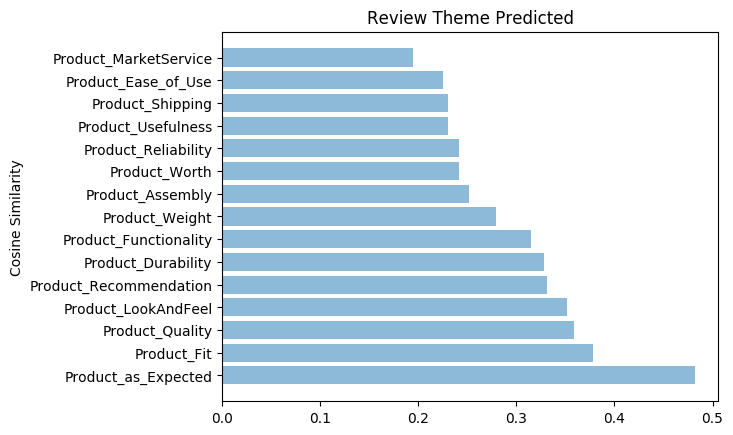

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


for i in range(0,1):
    objects = df['Theme'].iloc[i:i+15]
    performance = df['Cosine_Similarity'].iloc[i:i+15]

    plt.barh(objects,performance, align='center', alpha=0.5)

    plt.ylabel('Cosine Similarity')
    plt.title('Review Theme Predicted')
    plt.show()   

##Metric Cross check : Going through all the reviews that have zero accuracy and why

In [0]:
# df_metric_crosscheck = pd.read_csv('/content/BERT_classbalanced75BESTCrossCheck - BERT_classbalanced75BESTCrossCheck.csv')
df_metric_crosscheck = pd.read_csv('/content/BERT_classbalanced75BESTCrossCheck_Relevance.csv')

In [52]:
df_metric_crosscheck.head()

,Unnamed: 0,Theme,Cosine_Similarity,ReviewText_Number,asin,reviewText,summary,category,main_cat,Review_Theme,CorrectOrNot
0,0,Product_as_Expected,0.596253,0,B00004RAGL,Met the need for installing the dehymidifer.,Four Stars,"['Patio, Lawn & Garden', 'Gardening & Lawn Car...",Amazon Home,Product_Assembly,0
1,1,Product_Fit,0.586898,0,B00004RAGL,Met the need for installing the dehymidifer.,Four Stars,"['Patio, Lawn & Garden', 'Gardening & Lawn Car...",Amazon Home,Product_Assembly,0
2,2,Product_Recommendation,0.559724,0,B00004RAGL,Met the need for installing the dehymidifer.,Four Stars,"['Patio, Lawn & Garden', 'Gardening & Lawn Car...",Amazon Home,Product_Assembly,0
3,3,Product_MarketService,0.525125,0,B00004RAGL,Met the need for installing the dehymidifer.,Four Stars,"['Patio, Lawn & Garden', 'Gardening & Lawn Car...",Amazon Home,Product_Assembly,0
4,4,Product_Reliability,0.520495,0,B00004RAGL,Met the need for installing the dehymidifer.,Four Stars,"['Patio, Lawn & Garden', 'Gardening & Lawn Car...",Amazon Home,Product_Assembly,0


In [0]:
durable = df_metric_crosscheck.loc[df_metric_crosscheck['Review_Theme'] == 'Product_Durability']

In [43]:
durable.columns

Index(['Unnamed: 0', 'Theme', 'Cosine_Similarity', 'ReviewText_Number', 'asin',
       'reviewText', 'summary', 'category', 'main_cat', 'Review_Theme',
       'reviewText_embeddings', 'CorrectOrNot'],
      dtype='object')

In [54]:
durable.loc[durable.CorrectOrNot == 1]

,Unnamed: 0,Theme,Cosine_Similarity,ReviewText_Number,asin,reviewText,summary,category,main_cat,Review_Theme,CorrectOrNot
83,83,Product_Durability,0.294075,5,B00004RALL,I bought the Smokey Joe as a complement to my ...,The 22-inch is great for big grill-outs,"['Patio, Lawn & Garden', 'Grills & Outdoor Coo...",Amazon Home,Product_Durability,1
109,109,Product_Durability,0.310555,6,B01GBBYUB6,These are extremely durable and I think they'l...,I put two old cafeteria trays under my trays t...,"['Patio, Lawn & Garden', 'Gardening & Lawn Car...",Amazon Home,Product_Durability,1
118,118,Product_Durability,0.401178,7,B00TIUZJYU,Wanted to be eco-friendly with an electric mow...,not worth your trouble,"['Patio, Lawn & Garden', 'Outdoor Power Tools'...",Amazon Home,Product_Durability,1
132,132,Product_Durability,0.406321,8,B004001JA6,works great i have three of these i use in my ...,order one i have this one in my 57 chevy,"['Patio, Lawn & Garden', 'Pest Control', 'Repe...",Amazon Home,Product_Durability,1
144,144,Product_Durability,0.479792,9,B000B6B4VW,I use this on my alpacas. I've also been usin...,Protects for about a week,"['Patio, Lawn & Garden', 'Pest Control', 'Spra...",Pet Supplies,Product_Durability,1


In [44]:
for i in range(0,5*16,16):
    print('----------------------')
    print(durable.reviewText.iloc[i])

----------------------
Senor lost connection every 4 -6 hours (even less then 10 feet away).  You have to unscrew the back and take the batteries out every time to reset.  A total design failure in my opinion.  Sent it back after 1 week of total frustration!
----------------------
I bought the Smokey Joe as a complement to my much larger 22-inch Weber. The 22-inch is great for big grill-outs, but it eats up so much charcoal, and lasts so long, that it makes me feel like I need to invite the whole neighborhood and cook all the meat in the house whenever I get it started.

The Smokey Joe is great for cooking burgers for three or four people, or as a little s'mores fire on the back porch. If you're a poor/single/lazy student like me, it's perfect for grilling four or five days worth of chicken breasts to reheat later (and they'll still taste great). You can even throw some vegetables on there if you're feeling healthy and/or fancy.

It pairs really well with a larger charcoal grill. Whene

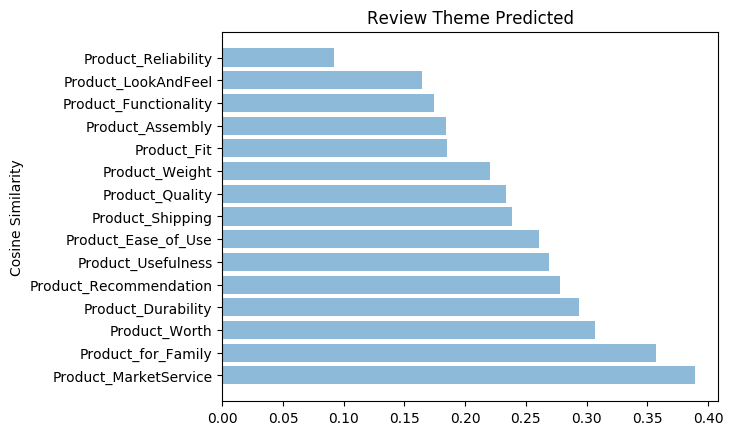

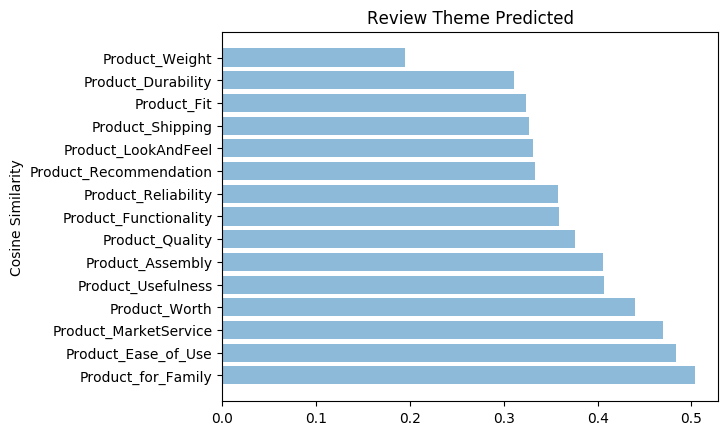

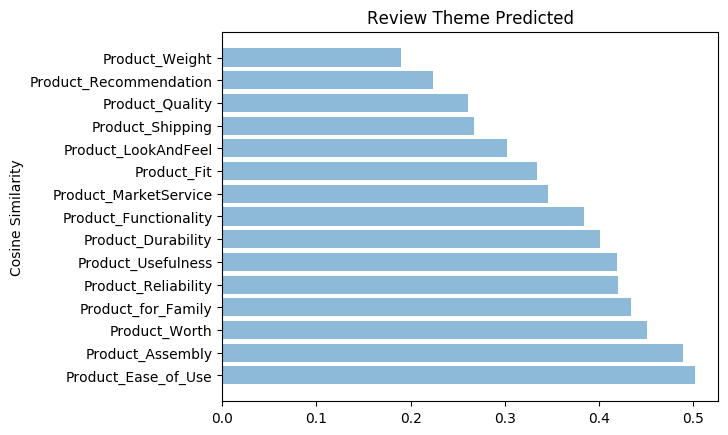

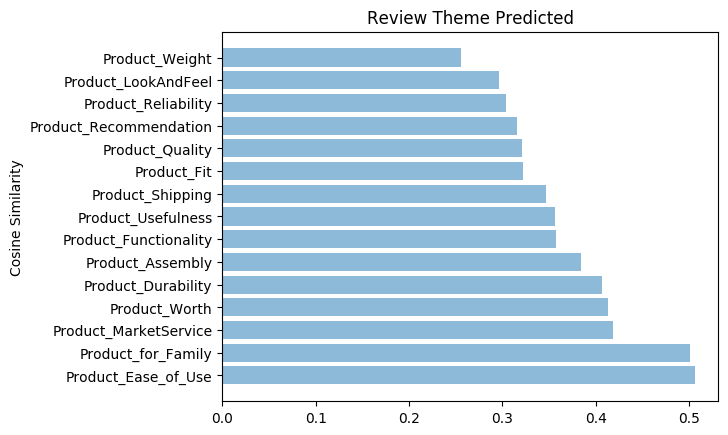

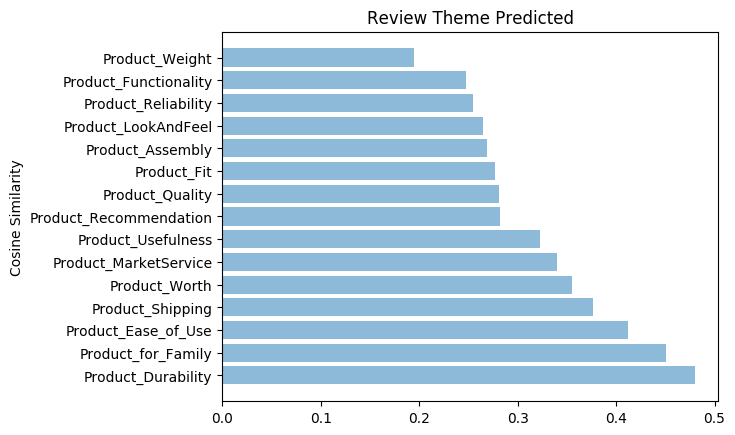

In [58]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


for i in range(0,5*16,16): #n reviews * number_of_distinct_themes
    objects = durable['Theme'].iloc[i:i+15]
    performance = durable['Cosine_Similarity'].iloc[i:i+15]

    plt.barh(objects,performance, align='center', alpha=0.5)

    plt.ylabel('Cosine Similarity')
    plt.title('Review Theme Predicted')
    plt.show()   

In [0]:
durable = durable.drop_duplicates(['Unnamed: 0', 'Theme', 'Cosine_Similarity', 'ReviewText_Number', 'asin',
       'reviewText', 'summary', 'category', 'main_cat', 'Review_Theme'])

In [0]:
weight = df_metric_crosscheck.loc[df_metric_crosscheck['Review_Theme'] == 'Product_Weight']

In [60]:
for i in range(0,4*16,16):
    print('-------------')
    print(weight.reviewText.iloc[i])

-------------
product works well in soil. A bit low in NPK ratio, but is 100% organic. Will use again,and again. Has no smell and a slight bitter taste. (had to all organic.) No SALTS is natural phosphorus, and other stuff. Wont burn, I use rough math on this product with no negative plant effects.
 You can look up the "Heavy Metal" breakdown of most registered products here:

[...]

I HIGHLY recommend this product!
They have another bloom (same company) but if I remember it right it has a tiny % of nickel in it, (not 100% organic.)

 Heavy metals are "cleated" into most fertilizers which in time concentrate in your soil (most of them are a cancer causing agent known to the state of California. If you "overmix your fertilizer or use the SAME "Heavy fertilizer over and over time, it enhances these posions.)

 Not all fertilizers are for growing edible food or meant for human consumption, (more for orchids, flowers, exotic houseplants and the likes.) When they add these cleated elements 

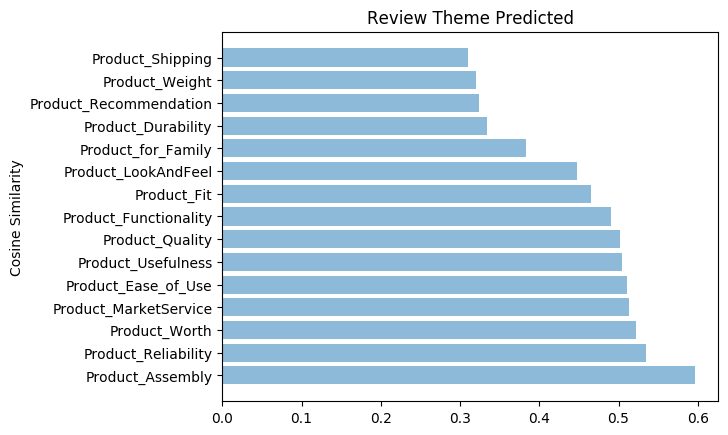

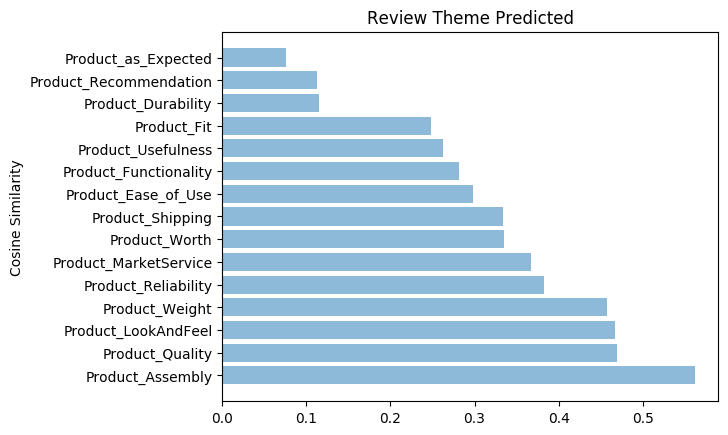

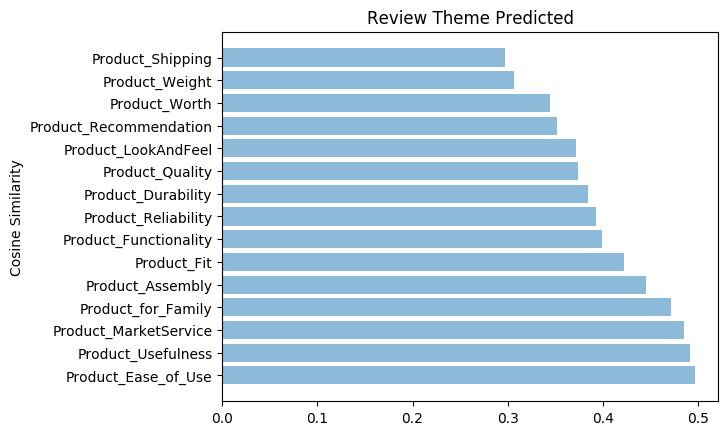

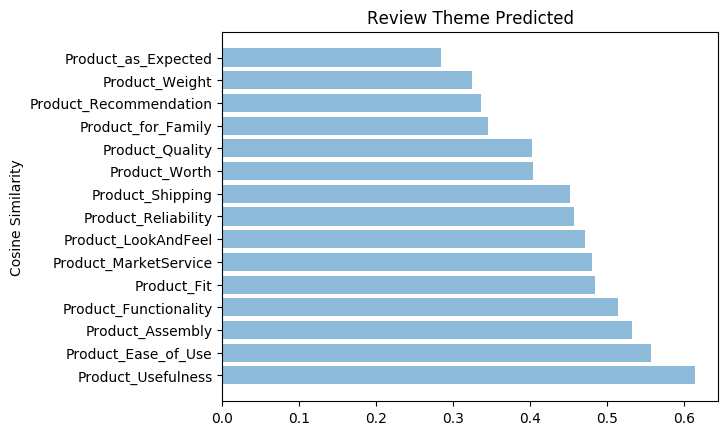

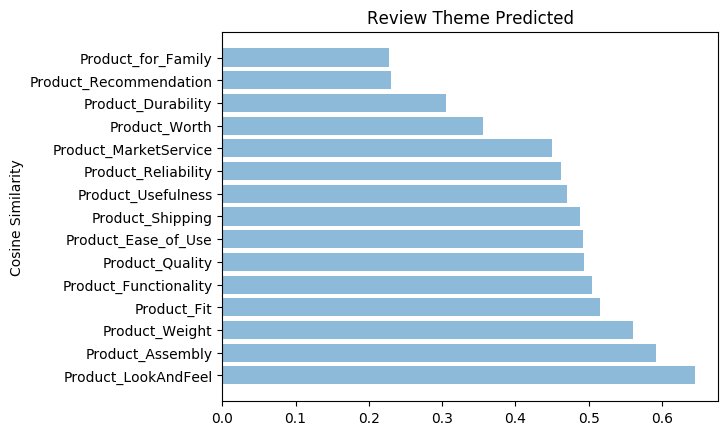

In [62]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


for i in range(0,5*16,16): #n reviews * number_of_distinct_themes
    objects = weight['Theme'].iloc[i:i+15]
    performance = weight['Cosine_Similarity'].iloc[i:i+15]

    plt.barh(objects,performance, align='center', alpha=0.5)

    plt.ylabel('Cosine Similarity')
    plt.title('Review Theme Predicted')
    plt.show()   

In [46]:
weight.columns

Index(['Unnamed: 0', 'Theme', 'Cosine_Similarity', 'ReviewText_Number', 'asin',
       'reviewText', 'summary', 'category', 'main_cat', 'Review_Theme',
       'CorrectOrNot', 'accuracy'],
      dtype='object')

In [0]:
weight = weight.drop_duplicates(['Unnamed: 0', 'Theme', 'Cosine_Similarity', 'ReviewText_Number', 'asin',
       'reviewText', 'summary', 'category', 'main_cat', 'Review_Theme'])

In [0]:
l_f = df_metric_crosscheck.loc[df_metric_crosscheck['Review_Theme'] == 'Product_LookAndFeel']

In [51]:
l_f.columns

Index(['Unnamed: 0', 'Theme', 'Cosine_Similarity', 'ReviewText_Number', 'asin',
       'reviewText', 'summary', 'category', 'main_cat', 'Review_Theme',
       'CorrectOrNot', 'accuracy'],
      dtype='object')

In [0]:
l_f = l_f.drop_duplicates(['Unnamed: 0', 'Theme', 'Cosine_Similarity', 'ReviewText_Number', 'asin',
       'reviewText', 'summary', 'category', 'main_cat', 'Review_Theme'])

In [65]:
for i in range(0,5*16,16):
    print('-------------')
    print(l_f.reviewText.iloc[i])

-------------
I already had a frog that lookd exactly like the one pictured. The one I received looked drastically different and not in a good way. Sent it back. Same size but finish was not great.
-------------
Haven't had the opportunity to use the block yet but looking forward to trying it out. This particular tool measures out as specified however, in hindsight, I feel a block with more open area would have been a better choice. Still, it's great to have a variety of tools on hand. I may yet discover many applications for its use.
-------------
Living in an apartment or condo where gas grills are not allowed due to safety, this is a great alternative. If you can follow basic directions and have the patience to assemble it, you won't have any issues. I haven't had any issues heating up the grill, just leave the lid closed and the heat will rise quick. Burgers come out juicy with nice sear marks. It doesn't flair up which is nice. Nice quality porcelain grate makes cleaning easy. I g

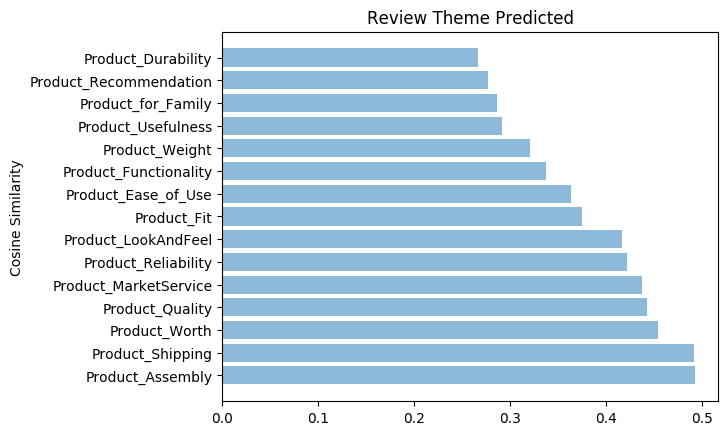

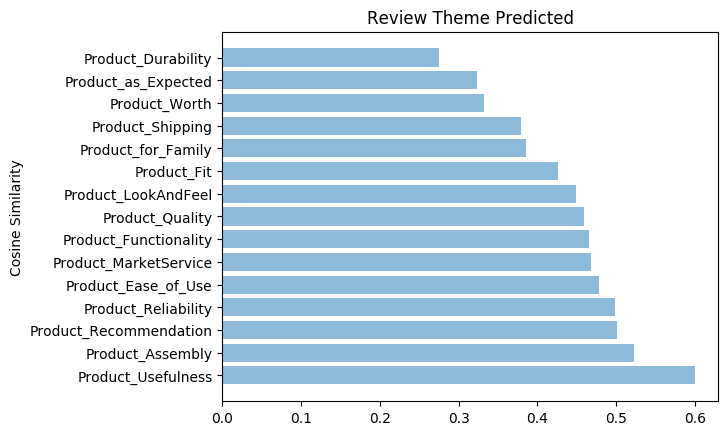

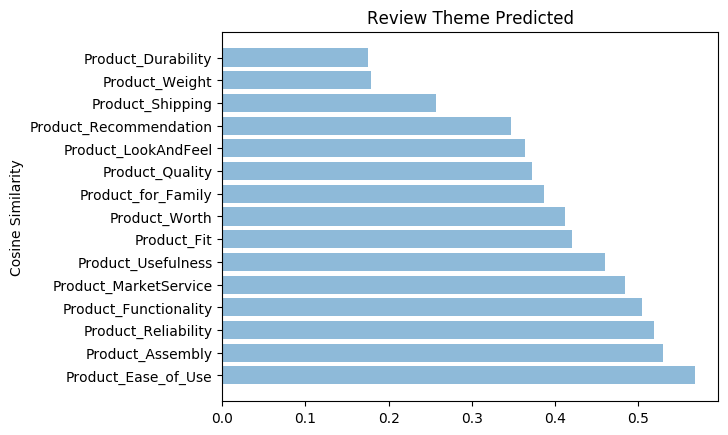

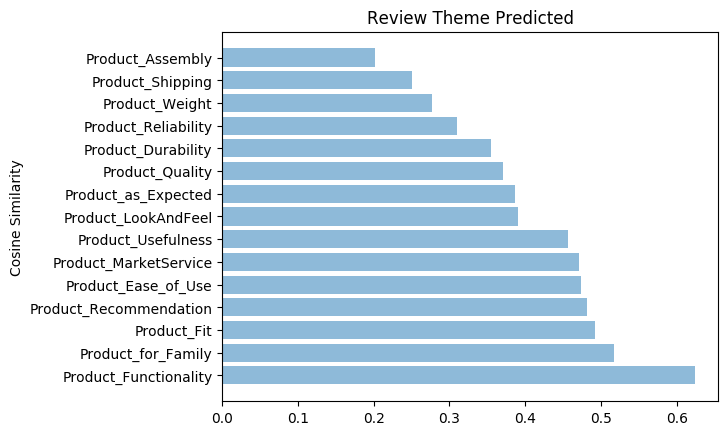

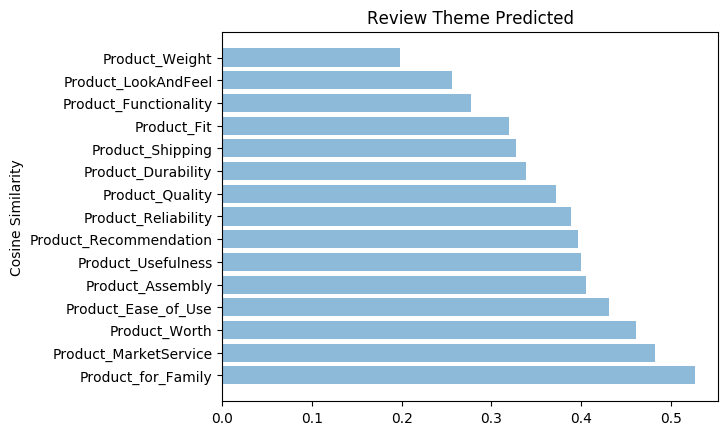

In [66]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


for i in range(0,5*16,16): #n reviews * number_of_distinct_themes
    objects = l_f['Theme'].iloc[i:i+15]
    performance = l_f['Cosine_Similarity'].iloc[i:i+15]

    plt.barh(objects,performance, align='center', alpha=0.5)

    plt.ylabel('Cosine Similarity')
    plt.title('Review Theme Predicted')
    plt.show()   

In [0]:
reliability = df_metric_crosscheck.loc[df_metric_crosscheck['Review_Theme'] == 'Product_Reliability']

In [0]:
reliability = reliability.drop_duplicates(['Unnamed: 0', 'Theme', 'Cosine_Similarity', 'ReviewText_Number', 'asin',
       'reviewText', 'summary', 'category', 'main_cat', 'Review_Theme'])

In [68]:
for i in range(0,5*16,16):
    print('-------------')
    print(reliability.reviewText.iloc[i])

-------------
When I got this canopy 2 months ago, it draped well over my frame and the green color looked great. I was planning to give it 5 stars, but in just two months time the color has noticeably faded, therefore, it gets one star.  I had hoped that it would last a few years like my previous canopy which I had bought at Target for less money, but it will be a wonder if it lasts just one season without developing material fatigue.  My precious money has gone down the drain.  I did not expect Amazon to carry such unreliable products.
-------------
Every year we have to spray out backyard for spiders, especially black widows. In the past my husband sprayed the kind that you mix with water and spray with a nozzle. It worked alright but we were ready to try something new. This was much easier and way more effective. My husband said the minute he sprayed it he could watch the spiders scurry out and shrivel up. The old stuff never worked that well. One can went a lot further than we tho